# Problem 3.4, SP 11

In chess, the king can move one square at a time in any direction (horizontally, vertically, or diagonally).

<style>
.aligncenter {
    text-align: center;
}
</style>

<p class="aligncenter">
    <img src="https://herculeschess.com/wp-content/uploads/2020/04/moving.png" alt="Legal moves for King on chessboard" />
</p>

For example, in the diagram above, the kings can move to any of 8 possible squares. A king is wandering around on an otherwise empty 8x8 chessboard, where for each move all possibilities are equally likely. Find the stationary distributuion of this chain.

In [1]:
# Import dependencies
from itertools import product
from typing import Dict, Tuple
import random

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation functions

def next_move(f: int, r: int) -> Tuple:
    '''
    Make legal random move with King on standard 8x8 chessboard. Returns (file, rank) of new position given
    f and r (file and rank, resp.) of current position.
    '''
    # Valid king moves
    king_moves = tuple(set(product([-1, 0, 1], repeat=2)) - {(0, 0)})

    # Return new coordinates if still on board, otherwise keep random move
    while True:
        
        # Make random move
        df, dr = random.choice(king_moves)

        # Attempt move
        new_f, new_r = f + df, r + dr
        if (new_r >= 0 and new_r < 8 and new_f >= 0 and new_f < 8):
            return (new_f, new_r)

        
def random_walk(f: int = 4, r: int = 5, N: int = 1_000_000) -> Dict:
    '''
    Simulate random walk of king over standard 8x8 chessboard. Return empirical stationary distribution.
    '''
    # Initiatialize stationary distribution dict and initial position
    stationary_distribution_cnts = {position: 0 for position in product(range(8), repeat=2)}
    stationary_distribution_cnts[(f, r)] += 1
    
    for _ in range(N):
        
        # Get new position, add to distribution
        new_f, new_r = next_move(f, r)
        stationary_distribution_cnts[(new_f, new_r)] += 1
        
        # "Move" king to new position
        f, r = new_f, new_r
    
    # Return normalized, stationary distribution
    stationary_distribution = {k: v / N for k, v in stationary_distribution_cnts.items()}
    return stationary_distribution

## Simulation

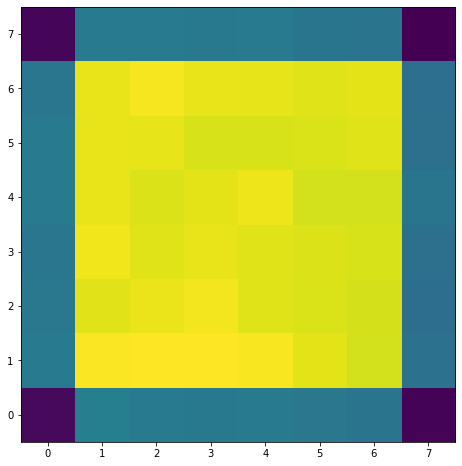

In [3]:
# Run simulation
data = random_walk(0, 4)

# Transform data
f, r, weights = list(zip(*[(k[0], k[1], v) for k, v in data.items()]))

# Plot data
heatmap, _, _ = np.histogram2d(f, r, bins=8, weights=weights)
plt.gcf().set_size_inches(8, 8)
plt.imshow(heatmap, origin='lower')
plt.xticks(range(8))
plt.show()

By the looks of it, there are 3 _types_ of squares: "corners", "non-corner edges", and "central" squares. This seems to make sense given the common degree for squares of each type.